In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [19]:
import yfinance as yf

stock = "NFLX"
ticker = yf.Ticker(stock)
data = ticker.history(start="2013-01-01", end="2023-12-31", interval="1mo")["Close"]

data

Date
2013-01-01 00:00:00-05:00     23.605715
2013-02-01 00:00:00-05:00     26.868570
2013-03-01 00:00:00-05:00     27.040001
2013-04-01 00:00:00-04:00     30.867144
2013-05-01 00:00:00-04:00     32.321430
                                ...    
2023-08-01 00:00:00-04:00    433.679993
2023-09-01 00:00:00-04:00    377.600006
2023-10-01 00:00:00-04:00    411.690002
2023-11-01 00:00:00-04:00    473.970001
2023-12-01 00:00:00-05:00    486.880005
Name: Close, Length: 132, dtype: float64

In [6]:
type(data)

pandas.core.series.Series

In [7]:
pip install statsforecast

  Obtaining dependency information for statsforecast from https://files.pythonhosted.org/packages/30/57/12ce15a1309e5497ef4bf035ddcd98ffa6837976c36a3445976ff8f55b3e/statsforecast-1.7.6-py3-none-any.whl.metadata
  Obtaining dependency information for coreforecast>=0.0.12 from https://files.pythonhosted.org/packages/01/bb/8c44f08b356dc33abe5c24f9ca6a1c3b9f2423dd1dc050bc6a6a63861585/coreforecast-0.0.12-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for fugue>=0.8.1 from https://files.pythonhosted.org/packages/ec/38/46a0ef179f7279207a3263afeb8da4dd73f44d00b6cc999c96a39112d284/fugue-0.9.1-py3-none-any.whl.metadata
  Obtaining dependency information for utilsforecast>=0.1.4 from https://files.pythonhosted.org/packages/37/69/87944671ae5cac09a7e5e4367fdbf0226f7ca3e86d5523f7027ba6d64da3/utilsforecast-0.2.3-py3-none-any.whl.metadata
  Obtaining dependency information for triad>=0.9.7 from https://files.pythonhosted.org/packages/4f/c6/4aedce0522bb3c72f2d770e7e4c18b0e1f7716d2c7

In [8]:
# HistoricAverage's usage example:
from statsforecast.models import HistoricAverage

# Create an array with the observed values in Bricks:
y_mean = data.values

# Define the model, fit and predict:
model = HistoricAverage()
model = model.fit(y=y_mean)
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([254.63538, 254.63538, 254.63538], dtype=float32)}

In [10]:
pd.to_datetime(['2024-01-01', '2024-02-01', '2024-03-01'])

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01'], dtype='datetime64[ns]', freq=None)

In [11]:
# Specify the quarters predicted:
months_pred = pd.to_datetime(['2024-01-01', '2024-02-01', '2024-03-01'])

# Create a dataframe with the quarters and values predicted:
Y_pred_df = pd.DataFrame({'mean_forecast':y_hat_dict["mean"]}, index = months_pred)

In [12]:
Y_pred_df

,mean_forecast
2024-01-01,254.635376
2024-02-01,254.635376
2024-03-01,254.635376


In [13]:
pd.concat([data, Y_pred_df])

,0,mean_forecast
2013-01-01 00:00:00-05:00,23.605715,NaN
2013-02-01 00:00:00-05:00,26.868570,NaN
2013-03-01 00:00:00-05:00,27.040001,NaN
2013-04-01 00:00:00-04:00,30.867144,NaN
2013-05-01 00:00:00-04:00,32.321430,NaN
...,...,...
2023-11-01 00:00:00-04:00,473.970001,NaN
2023-12-01 00:00:00-05:00,486.880005,NaN
2024-01-01 00:00:00,NaN,254.635376
2024-02-01 00:00:00,NaN,254.635376


In [14]:
frame = pd.concat([data, Y_pred_df])
frame.columns = ['Values', 'mean_forecast']

In [26]:
data.index = data.index.tz_localize(None)

In [27]:
months_pred = pd.to_datetime(['2024-01-01', '2024-02-01', '2024-03-01']).tz_localize(None)

In [28]:
Y_pred_df = pd.DataFrame({'mean_forecast': y_hat_dict["mean"]}, index=months_pred)

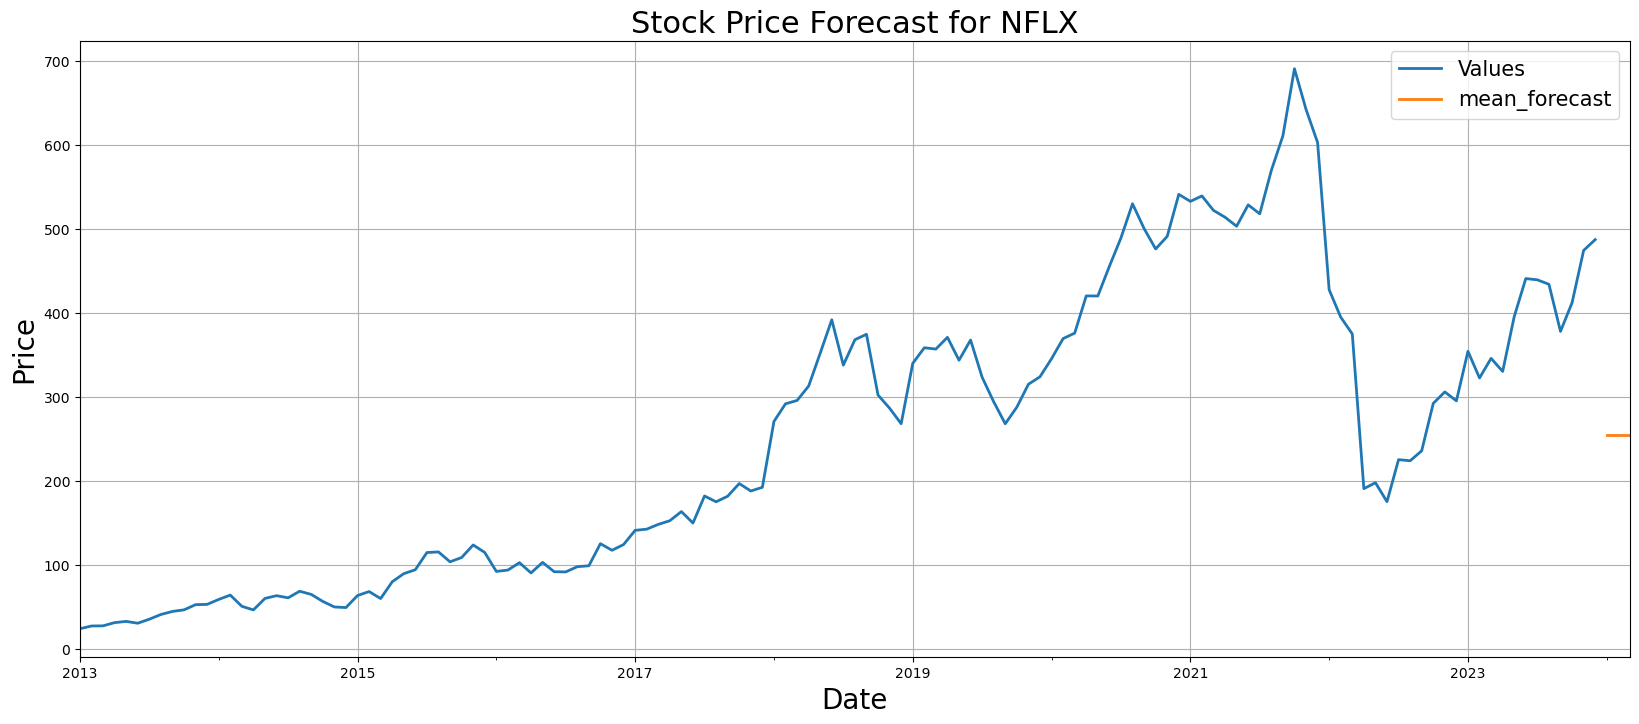

In [29]:
# Combine historical data and predictions
plot_df = pd.concat([data, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast']

fig, ax = plt.subplots(1, 1, figsize=(20, 8))
plot_df[['Values', 'mean_forecast']].plot(ax=ax, linewidth=2)

# Specify graph features
ax.set_title('Stock Price Forecast for NFLX', fontsize=22)
ax.set_ylabel('Price', fontsize=20)
ax.set_xlabel('Date', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

plt.show()

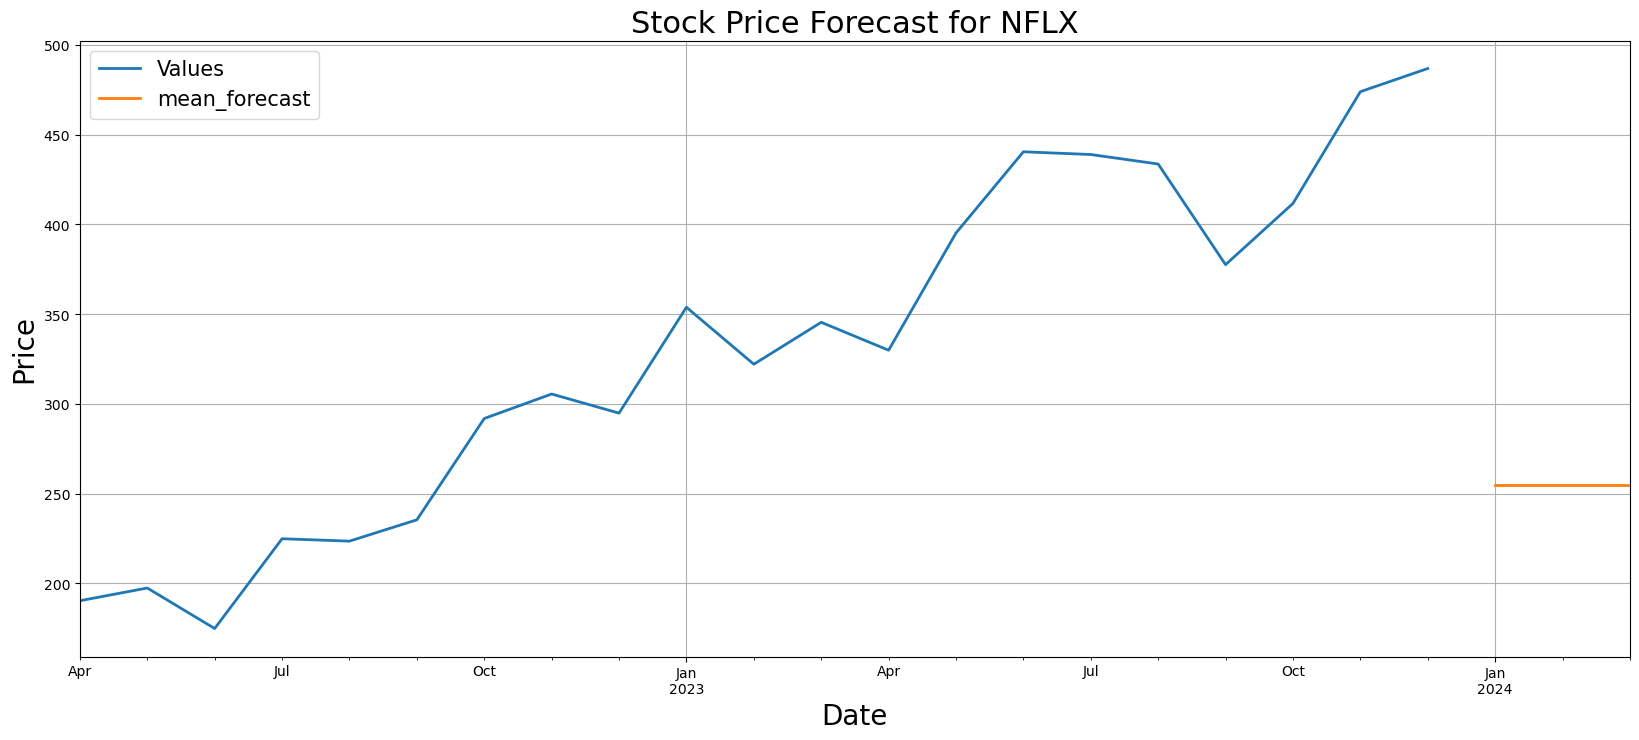

In [31]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([data, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Stock Price Forecast for NFLX', fontsize=22)
ax.set_ylabel('Price', fontsize=20)
ax.set_xlabel('Date', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [32]:
# Naive's usage example:
from statsforecast.models import Naive

# Define the model, fit and predict:
model = Naive()
model = model.fit(y=data.values)
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([486.88, 486.88, 486.88], dtype=float32)}

In [33]:
# Create a column with the values predicted:
Y_pred_df["naive_forecast"] = y_hat_dict["mean"]

In [34]:
Y_pred_df

,mean_forecast,naive_forecast
2024-01-01,254.635376,486.880005
2024-02-01,254.635376,486.880005
2024-03-01,254.635376,486.880005


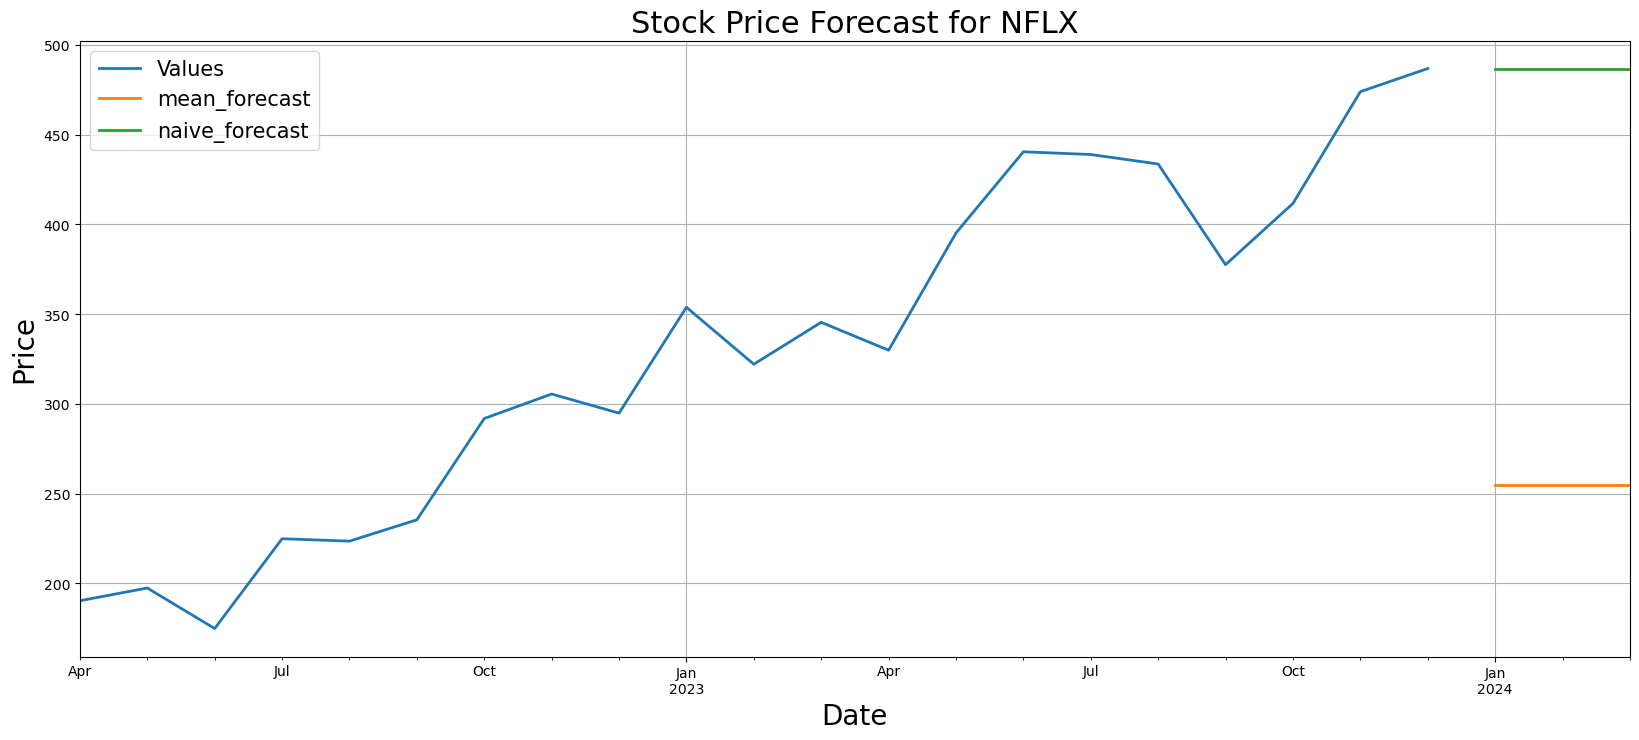

In [36]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([data, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Stock Price Forecast for NFLX', fontsize=22)
ax.set_ylabel('Price', fontsize=20)
ax.set_xlabel('Date', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [37]:
# SeasonalNaive's usage example:
from statsforecast.models import SeasonalNaive

# Define the model, fit and predict:
model = SeasonalNaive(season_length=12)
model = model.fit(y=data.values)
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([353.86, 322.13, 345.48], dtype=float32)}

In [38]:
# Create a column with the values predicted:
Y_pred_df["seasonal_naive_forecast"] = y_hat_dict["mean"]

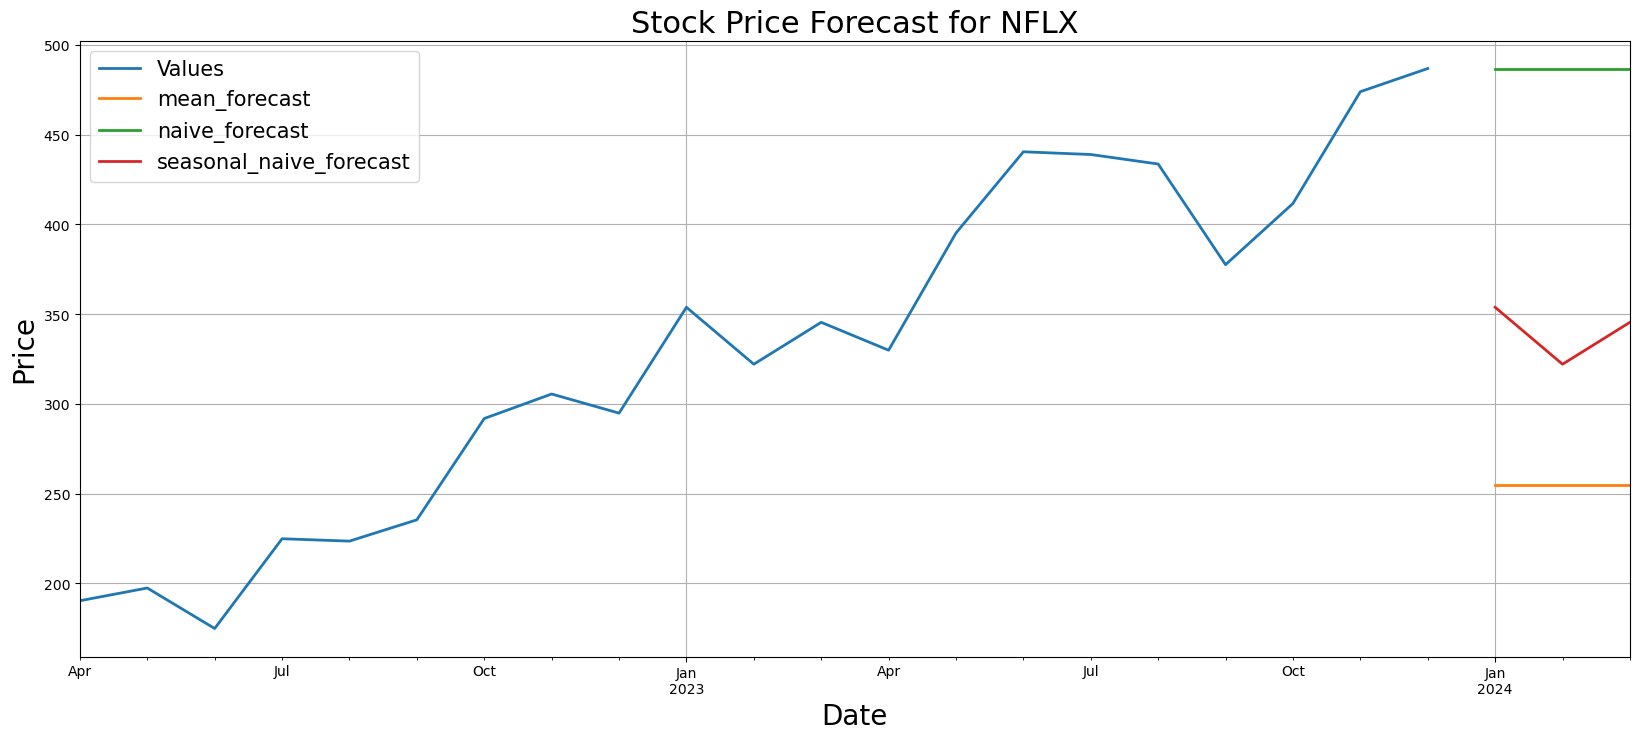

In [40]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([data, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast', 'seasonal_naive_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Stock Price Forecast for NFLX', fontsize=22)
ax.set_ylabel('Price', fontsize=20)
ax.set_xlabel('Date', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [41]:
# RandomWalkWithDrift's usage example:
from statsforecast.models import RandomWalkWithDrift

# Define the model, fit and predict:
model = RandomWalkWithDrift()
model = model.fit(y=data.values)
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([490.41644, 493.95288, 497.48935], dtype=float32)}

In [42]:
# Create a column with the values predicted:
Y_pred_df["drift_forecast"] = y_hat_dict["mean"]

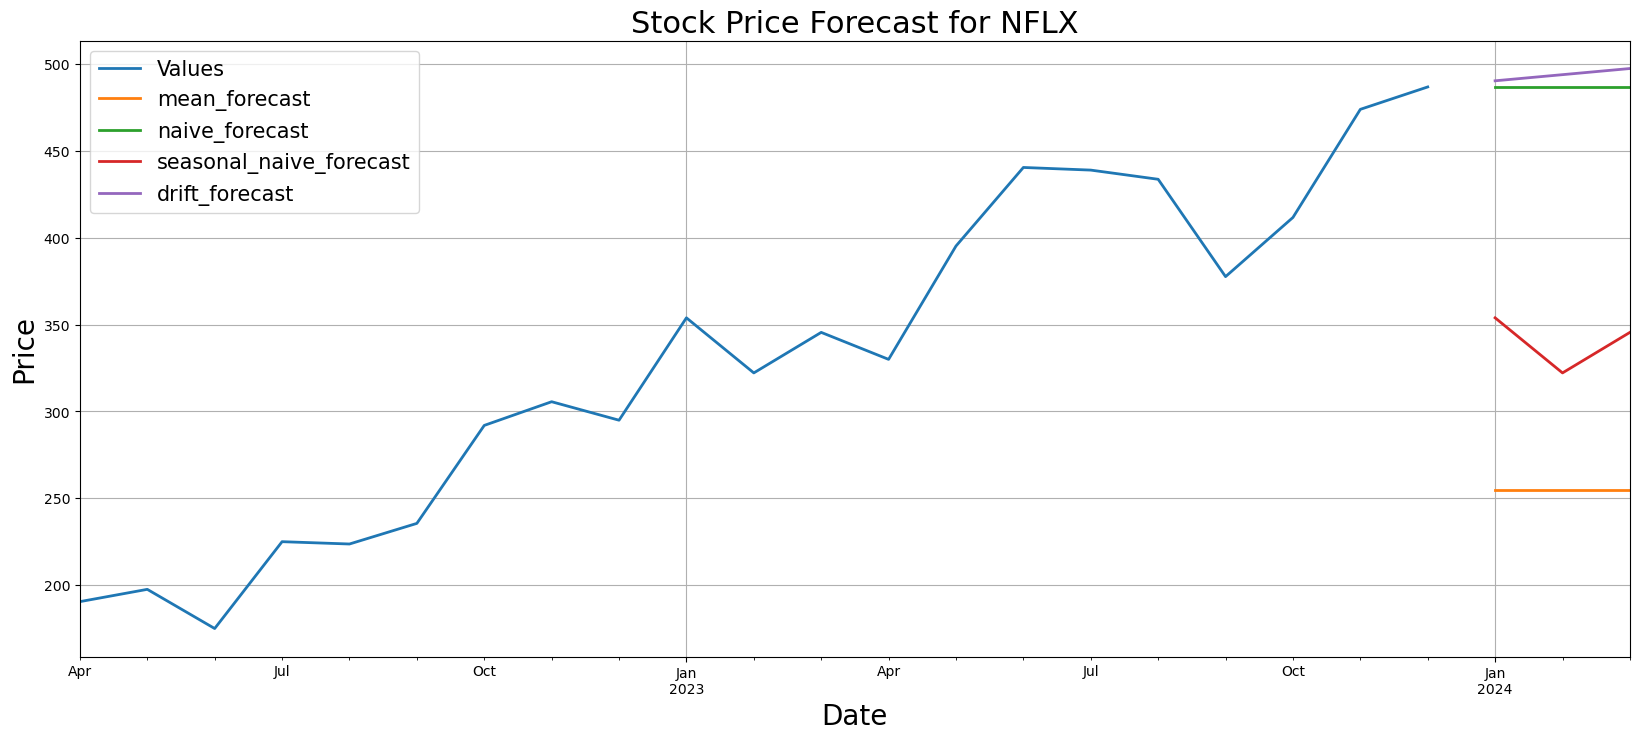

In [44]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([data, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast', 'seasonal_naive_forecast', 'drift_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Stock Price Forecast for NFLX', fontsize=22)
ax.set_ylabel('Price', fontsize=20)
ax.set_xlabel('Date', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

El que mejor se adecua, viendo como es la serie de tiempo, seria el de drift_forecast, para el seasonal_naive no nos sirve porque la serie de tiempo tiene poca estacionalidad

In [49]:
def augment(model_name, time_var, obs_values):

    type_model_list = []
    for n in range(len(obs_values)):
        type_model_list.append(model_name)
        n += 1
    fitted_values = model.predict_in_sample()
    residuals = obs_values - fitted_values["fitted"]

    augment_df = pd.DataFrame({'model':type_model_list,
                        'time_var':time_var,
                        'obs_values':obs_values,
                        'fitted_values':fitted_values["fitted"],
                        'residuals':residuals})

    return(augment_df)

In [50]:
# Define the model, fit and predict:
model = SeasonalNaive(season_length=12)
model = model.fit(y=data.values)
mean = model.predict(h=12)

In [51]:
# augment(model_name, time_var, obs_values)
augment_df = augment("Mean",data.index,data)

In [52]:
augment_df

,model,time_var,obs_values,fitted_values,residuals
Date,,,,,
2013-01-01,Mean,2013-01-01,23.605715,NaN,NaN
2013-02-01,Mean,2013-02-01,26.868570,NaN,NaN
2013-03-01,Mean,2013-03-01,27.040001,NaN,NaN
2013-04-01,Mean,2013-04-01,30.867144,NaN,NaN
2013-05-01,Mean,2013-05-01,32.321430,NaN,NaN
...,...,...,...,...,...
2023-08-01,Mean,2023-08-01,433.679993,223.559998,210.119995
2023-09-01,Mean,2023-09-01,377.600006,235.440002,142.160004
2023-10-01,Mean,2023-10-01,411.690002,291.880005,119.809998


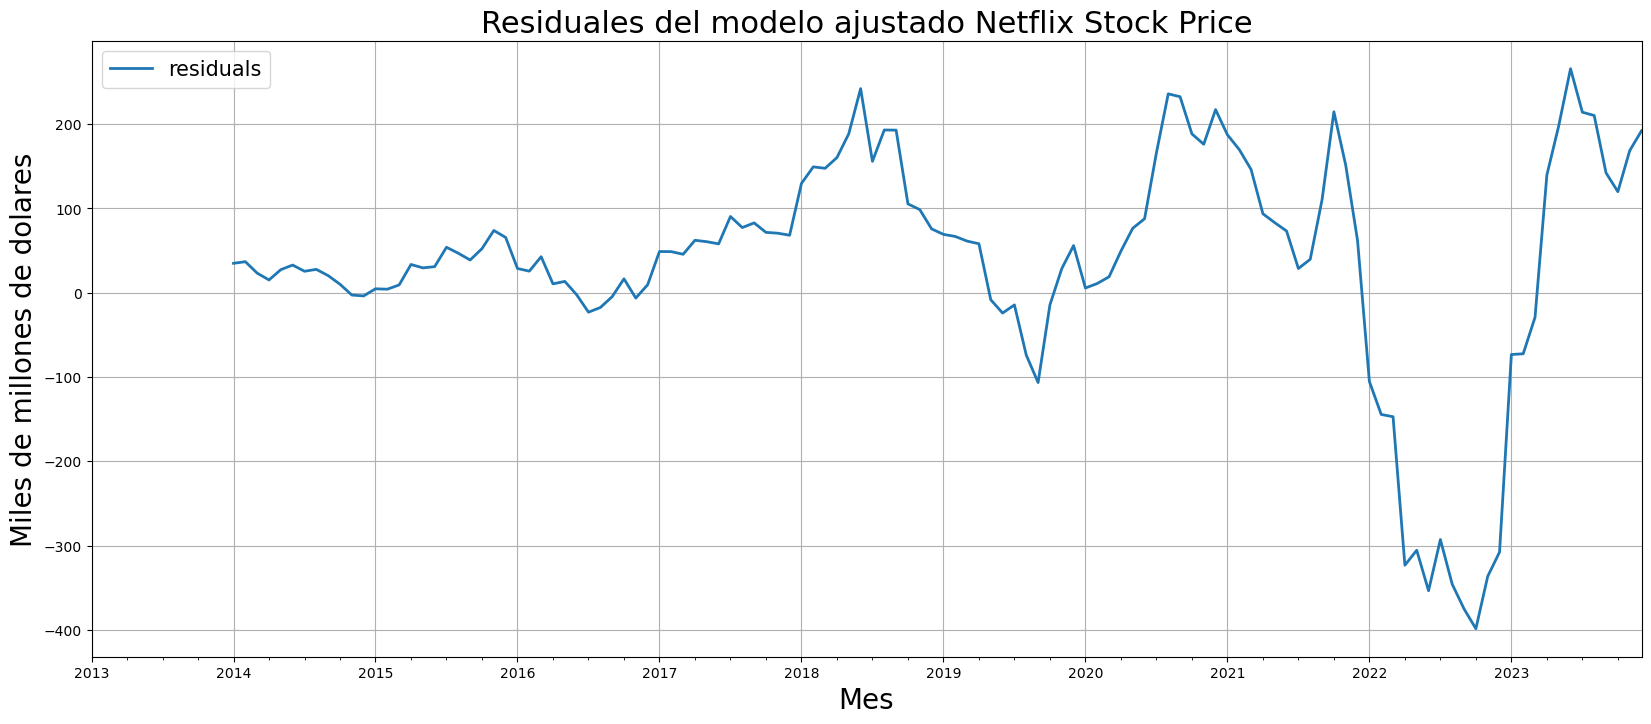

In [54]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))
augment_df['residuals'].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Residuales del modelo ajustado Netflix Stock Price', fontsize=22)
ax.set_ylabel('Miles de millones de dolares', fontsize=20)
ax.set_xlabel('Mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

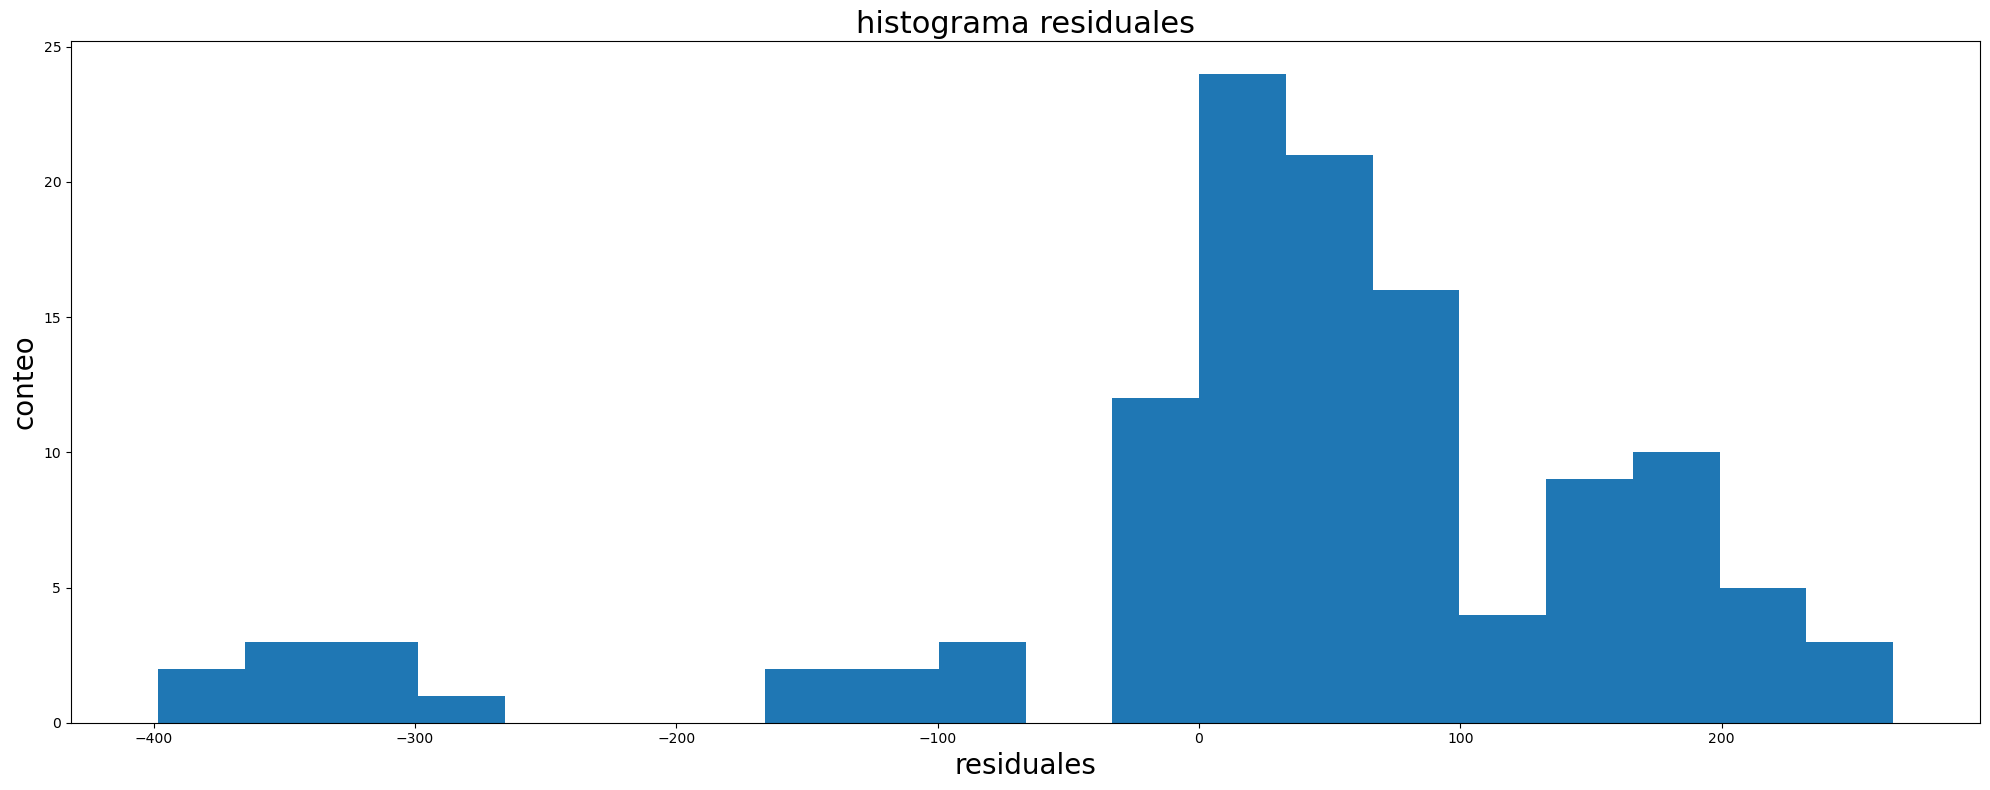

In [55]:
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(20, 8),
                        tight_layout = True)

axs.hist(augment_df["residuals"], bins = 20)

# Specify graph features:
axs.set_title('histograma residuales', fontsize=22)
axs.set_ylabel('conteo', fontsize=20)
axs.set_xlabel('residuales', fontsize=20)

# Show plot
plt.show()

Hay un sesgo hacia la derecha